<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/C4_Architecture_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4 Architecture Examples

In [6]:
#@title Install Diagrams
import os
result = os.system('pip install diagrams')
result = os.system('pip install httpimport')

In [7]:
from urllib import request

baseUrl = "https://raw.githubusercontent.com/7ft10/C4ArchitectureExamples/main/"
[name, response] = request.urlretrieve(baseUrl + 'Repository/Repository.py', '_Repository.py')

In [8]:
#@markdown ----------------------------------------------
#@markdown ## Attributes

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"
}


In [9]:
from _Repository import Personas, Systems

Personas.Print()
Systems.Print()

---

## BankingCustomer

| Key         | Value       |
                   | ----------- | ----------- |
| id | BankingCustomer |
| name | Banking Customer |
| description | Several lines of text, |

---

## API

| Key         | Value       |
                   | ----------- | ----------- |
| id | API |
| name | API |
| description | C# application |

---

## CustomA

| Key         | Value       |
                   | ----------- | ----------- |
| id | CustomA |
| name | Custom App |
| description | Custom Application |

---

## Email

| Key         | Value       |
                   | ----------- | ----------- |
| id | Email |
| name | Email |
| description | Microsoft Exchange Email |
| technology | Exchange |

---

## Mainframe

| Key         | Value       |
                   | ----------- | ----------- |
| id | Mainframe |
| name | Mainframe |
| description | AS400 IBM Mainframe |

---

## MobileApp

| Key         | Value       |
                   | ----------- | ----------- |
| id | MobileApp |
| name | Android App |
| description | Android App |

---

## OracleDB

| Key         | Value       |
                   | ----------- | ----------- |
| id | OracleDB |
| name | OracleDB |
| description | Oracle Database |

---

## SPA

| Key         | Value       |
                   | ----------- | ----------- |
| id | SPA |
| name | Single Page App |
| description | Single Page App |

---

## WebApp

| Key         | Value       |
                   | ----------- | ----------- |
| id | WebApp |
| name | WebApp |
| description | C# Web application |

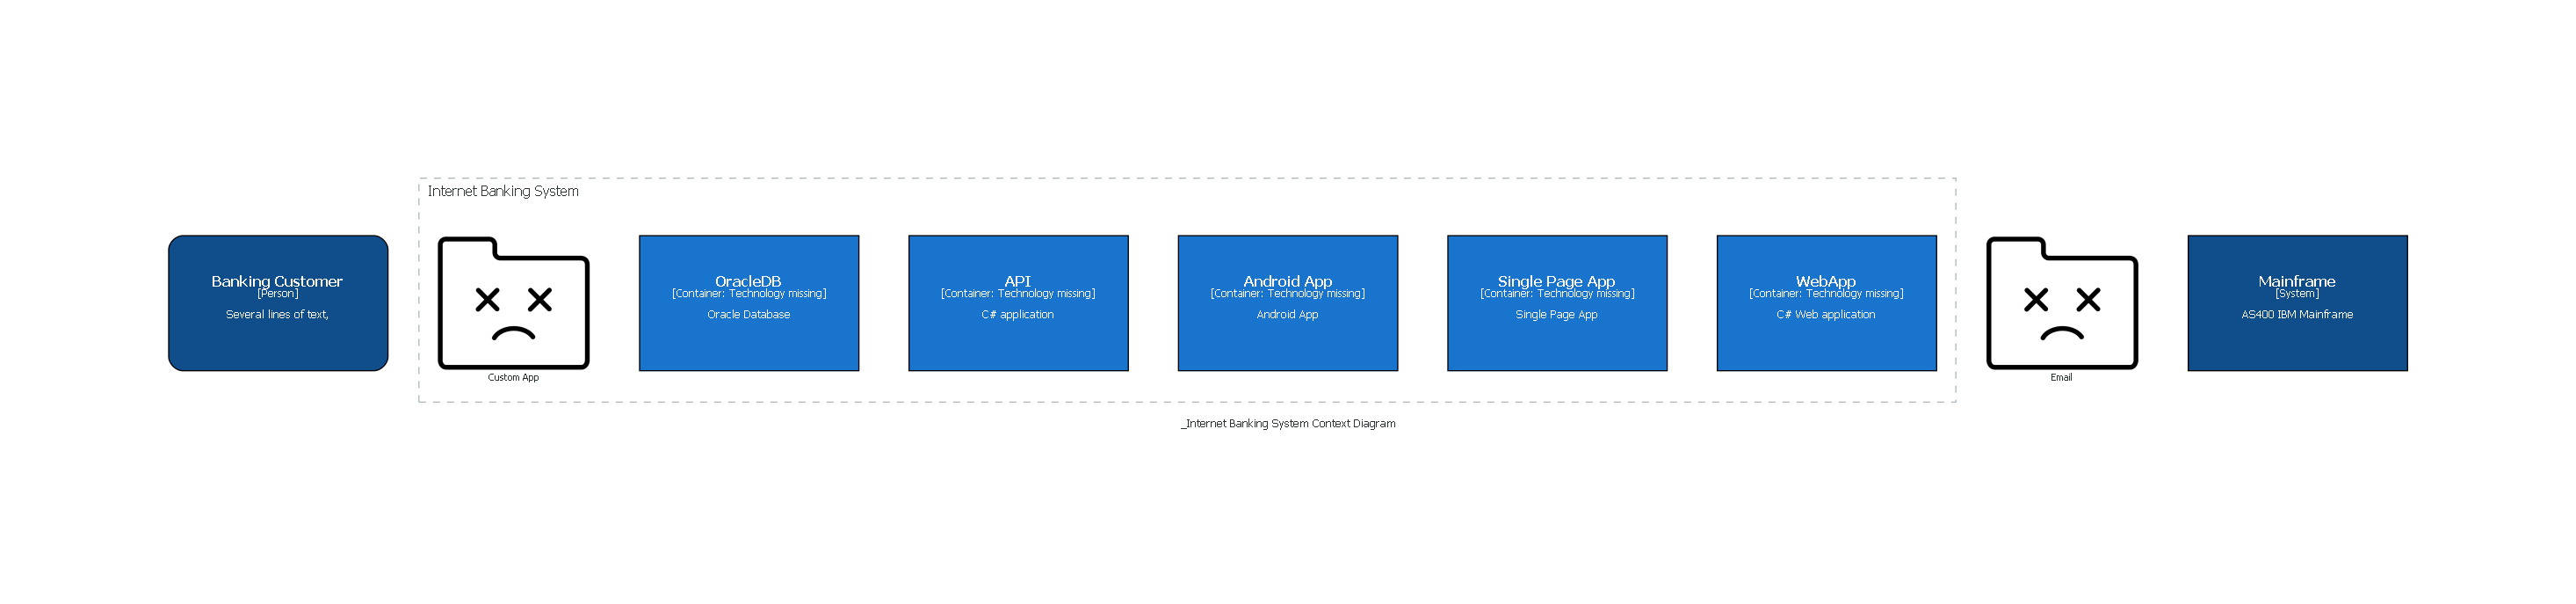

In [10]:
#@title Internet Banking System Context Diagram
from diagrams import Diagram
from diagrams.c4 import SystemBoundary, Relationship
from _Repository import Personas, Systems

settings =  {
  "name": "_Internet Banking System Context Diagram",
  "show": False,
  "outformat": "png",
  "direction": "TB",
  "graph_attr": global_graph_attr,
  "node_attr": global_node_attr
}

with Diagram(** settings) as diagram:
  
  customer = Personas.BankingCustomer.Get()

  with SystemBoundary("Internet Banking System"):
    webapp = Systems.WebApp.Get()
    spa = Systems.SPA.Get()
    mobileApp = Systems.MobileApp.Get()
    api = Systems.API.Get()
    database = Systems.OracleDB.Get()
    diagrams = Systems.CustomA.Get()

  email = Systems.Email.Get()
  mainframe = Systems.Mainframe.Get()

  customer >> Relationship("Visits big.bank.com/ib using [HTTPS]") >> webapp
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileApp]
  webapp >> Relationship("Delivers to the customer's web browser") >> spa
  spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
  mobileApp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

  api >> Relationship("reads from and writes to") >> database
  api >> Relationship("Sends email using [SMTP]") >> email
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
  customer << Relationship("Sends e-mails to") << email

diagram